Problem Statement:

Implement depth first search algorithm and Breadth First Search algorithm, Use an undirected 
graph and develop a recursive algorithm for searching all the vertices of a graph or tree data 
structure.

In [18]:
# Cell 1: Import necessary libraries
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

In [19]:
# Cell 2: Create a tree-like undirected graph
def create_tree():
    # This is an undirected tree structure
    # Each node connects to its parent and children
    tree = {
        'A': ['B', 'C', 'D'],  # Root node with 3 children
        'B': ['A', 'E', 'F'],  # B connects to parent A and children E, F
        'C': ['A', 'G'],       # C connects to parent A and child G
        'D': ['A', 'H', 'I'],  # D connects to parent A and children H, I
        'E': ['B'],            # E connects to parent B
        'F': ['B'],            # F connects to parent B
        'G': ['C'],            # G connects to parent C
        'H': ['D'],            # H connects to parent D
        'I': ['D']             # I connects to parent D
    }
    return tree

In [24]:
# Cell 3: Function to visualize the tree with hierarchical layout
def visualize_tree(tree, visited=None, current=None, title="Tree"):
    """Draw the tree with optional highlighting for visited nodes and current node"""
    # Create a NetworkX graph
    G = nx.Graph()
    
    # Add edges from our tree dictionary
    for vertex, neighbors in tree.items():
        for neighbor in neighbors:
            G.add_edge(vertex, neighbor)
    
    # Set up the figure
    plt.figure(figsize=(10, 8))
    
    # Create a custom hierarchical layout to make it look like a tree
    pos = {
        'A': (0, 0),       # Root node at the top
        'B': (-3, -1),     # First level, left
        'C': (0, -1),      # First level, middle
        'D': (3, -1),      # First level, right
        'E': (-4, -2),     # Second level under B
        'F': (-2, -2),     # Second level under B
        'G': (0, -2),      # Second level under C
        'H': (2, -2),      # Second level under D
        'I': (4, -2)       # Second level under D
    }
    
    # Default node colors
    if visited is None:
        visited = []
    
    # Color scheme: lightblue=unvisited, green=visited, red=current
    node_colors = []
    for node in G.nodes():
        if node == current:
            node_colors.append('red')      # Current node
        elif node in visited:
            node_colors.append('green')    # Visited node
        else:
            node_colors.append('lightblue')  # Unvisited node
    
    # Draw the tree
    nx.draw(G, pos, with_labels=True, node_color=node_colors,
            node_size=700, font_weight='bold', font_size=15)
    
    plt.title(title)
    plt.show()


In [25]:
# Cell 4: Depth-First Search (DFS) implementation - recursive
def dfs_recursive(tree, start, visited=None, visualize=True):
    # Initialize visited list if not provided
    if visited is None:
        visited = []
    
    # Add current node to visited
    visited.append(start)
    
    # Visualize current step
    if visualize:
        visualize_tree(tree, visited, start, f"DFS - Visiting: {start}")
        print(f"Visited: {start}")
    
    # Visit all unvisited neighbors recursively
    for neighbor in tree[start]:
        if neighbor not in visited:
            dfs_recursive(tree, neighbor, visited, visualize)
    
    return visited


In [26]:
# Cell 5: Breadth-First Search (BFS) implementation
def bfs(tree, start, visualize=True):
    # Keep track of visited nodes
    visited = []
    # Queue to manage nodes to visit
    queue = deque([start])
    
    # Process nodes until queue is empty
    while queue:
        # Get the next vertex from queue
        current = queue.popleft()
        
        # Skip if already visited
        if current in visited:
            continue
        
        # Mark as visited
        visited.append(current)
        
        # Visualize current step
        if visualize:
            visualize_tree(tree, visited, current, f"BFS - Visiting: {current}")
            print(f"Visited: {current}")
        
        # Add unvisited neighbors to queue
        for neighbor in tree[current]:
            if neighbor not in visited:
                queue.append(neighbor)
    
    return visited


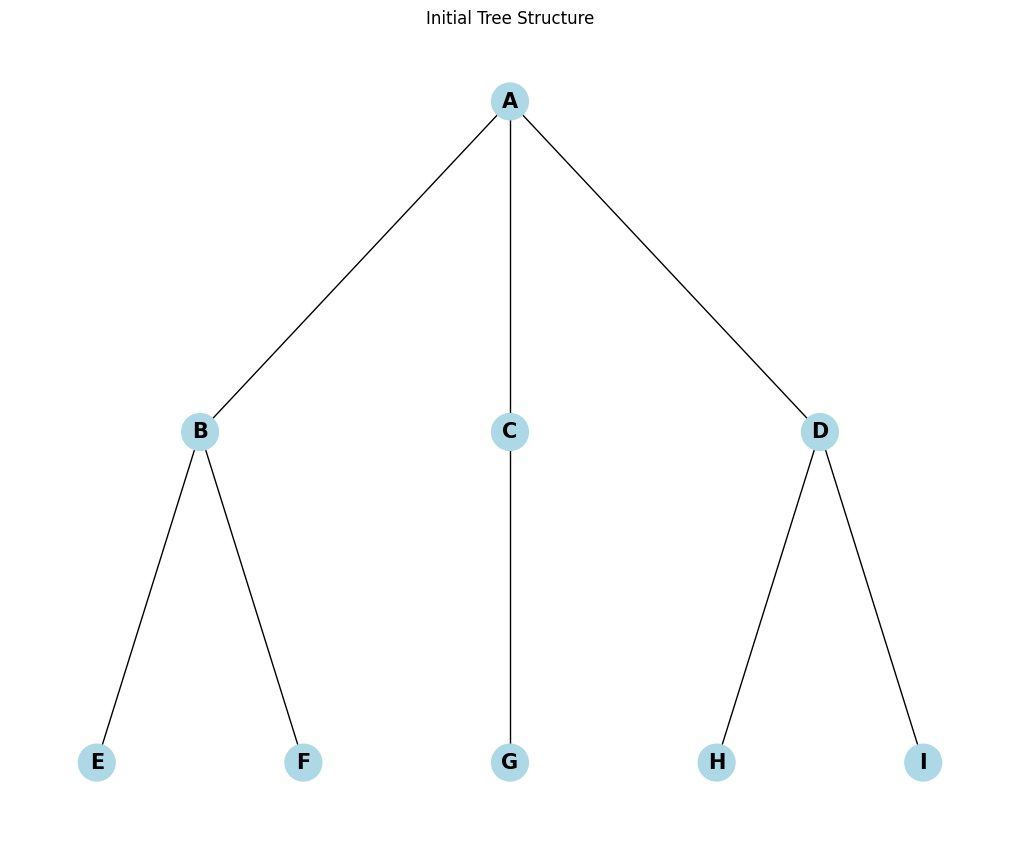

In [27]:
# Cell 6: Create the tree and visualize it
tree = create_tree()
visualize_tree(tree, title="Initial Tree Structure")

Running Depth-First Search (DFS) starting from node 'A':


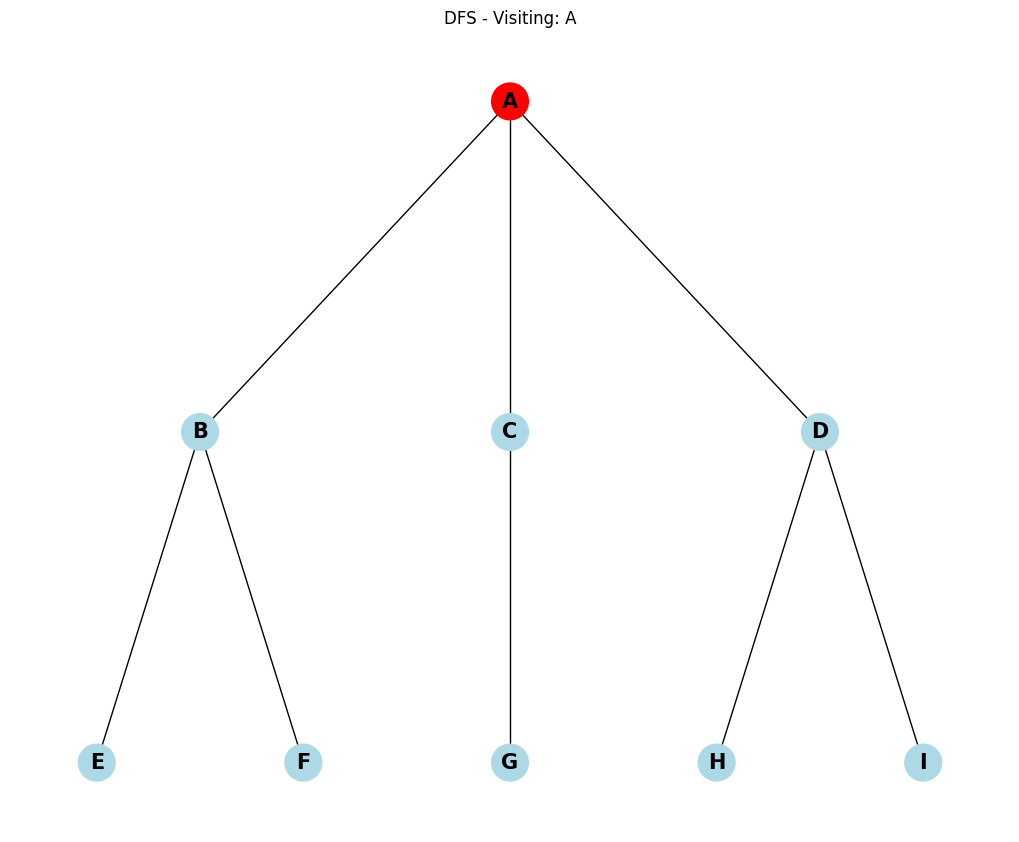

Visited: A


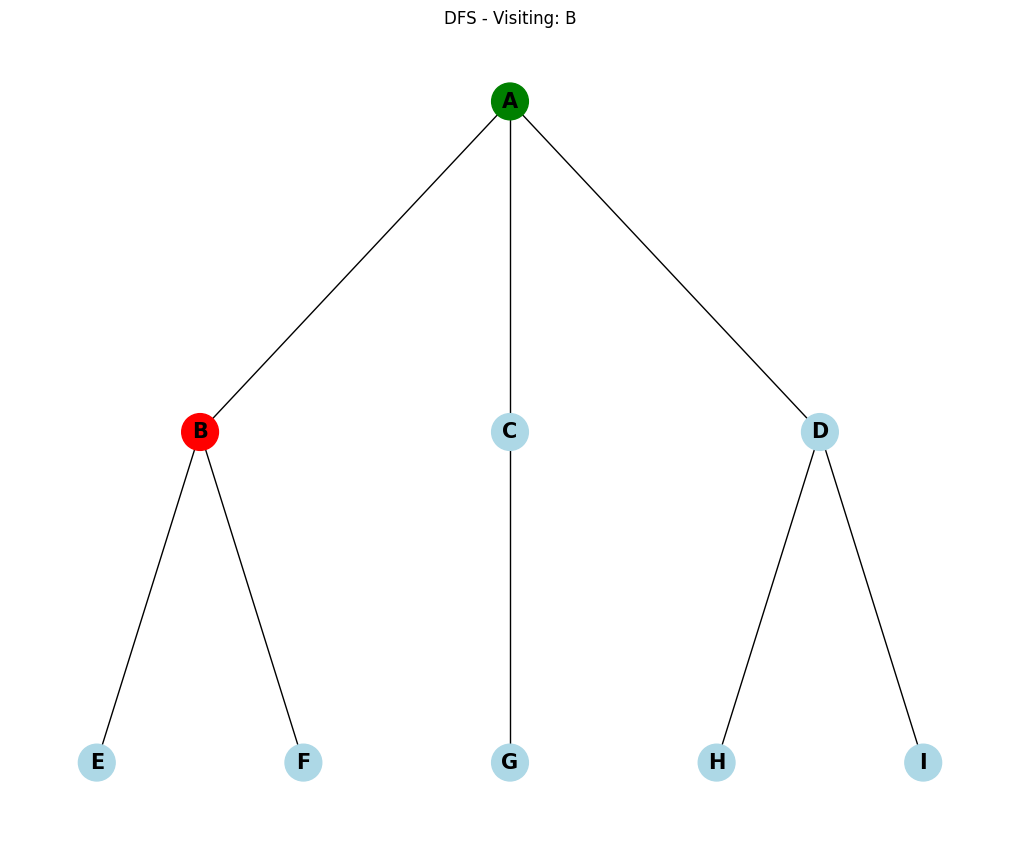

Visited: B


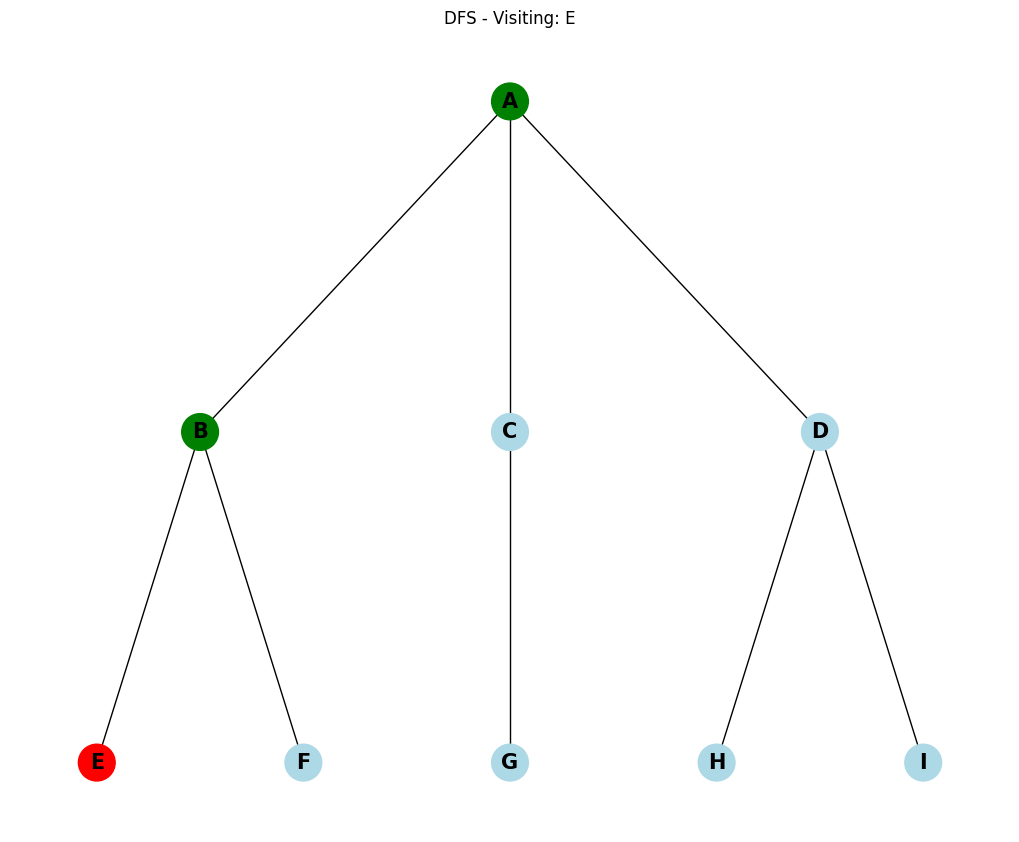

Visited: E


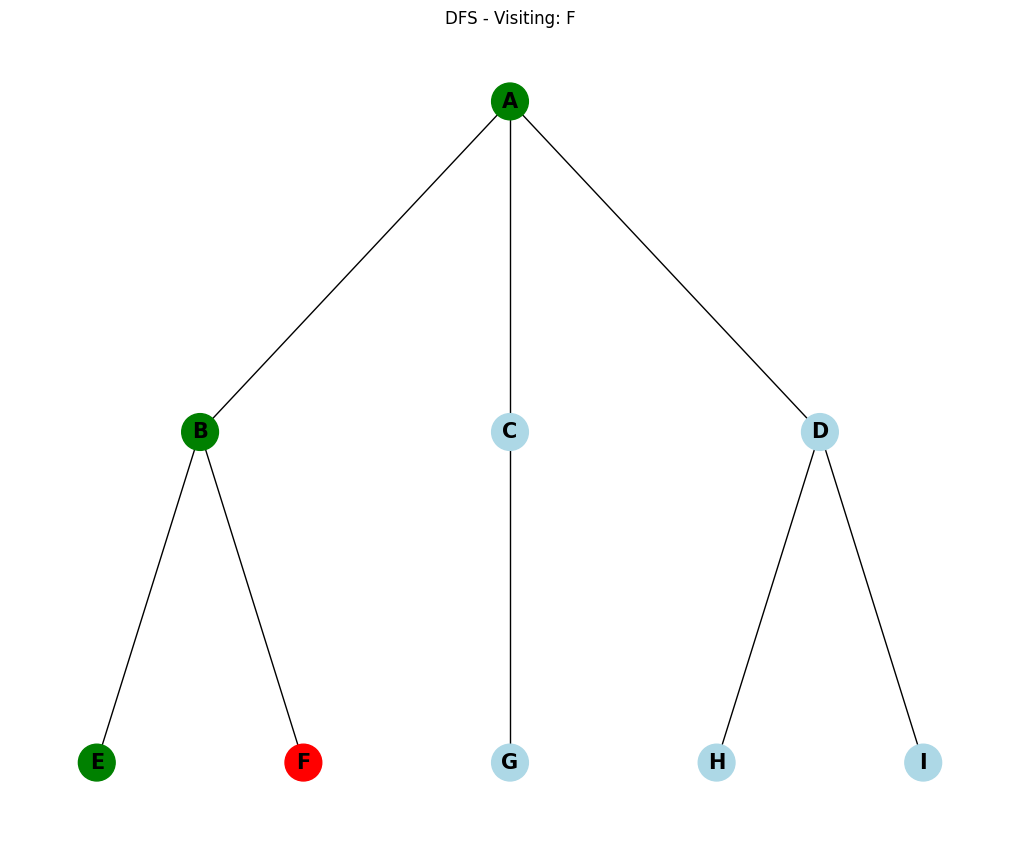

Visited: F


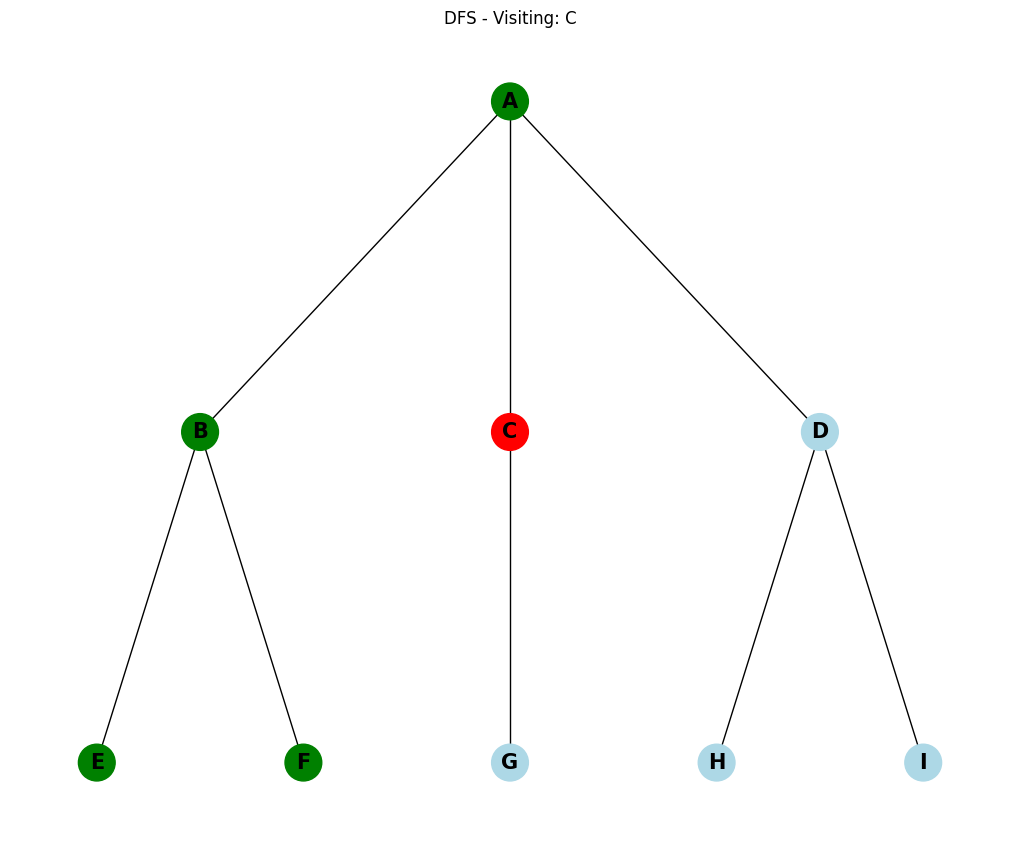

Visited: C


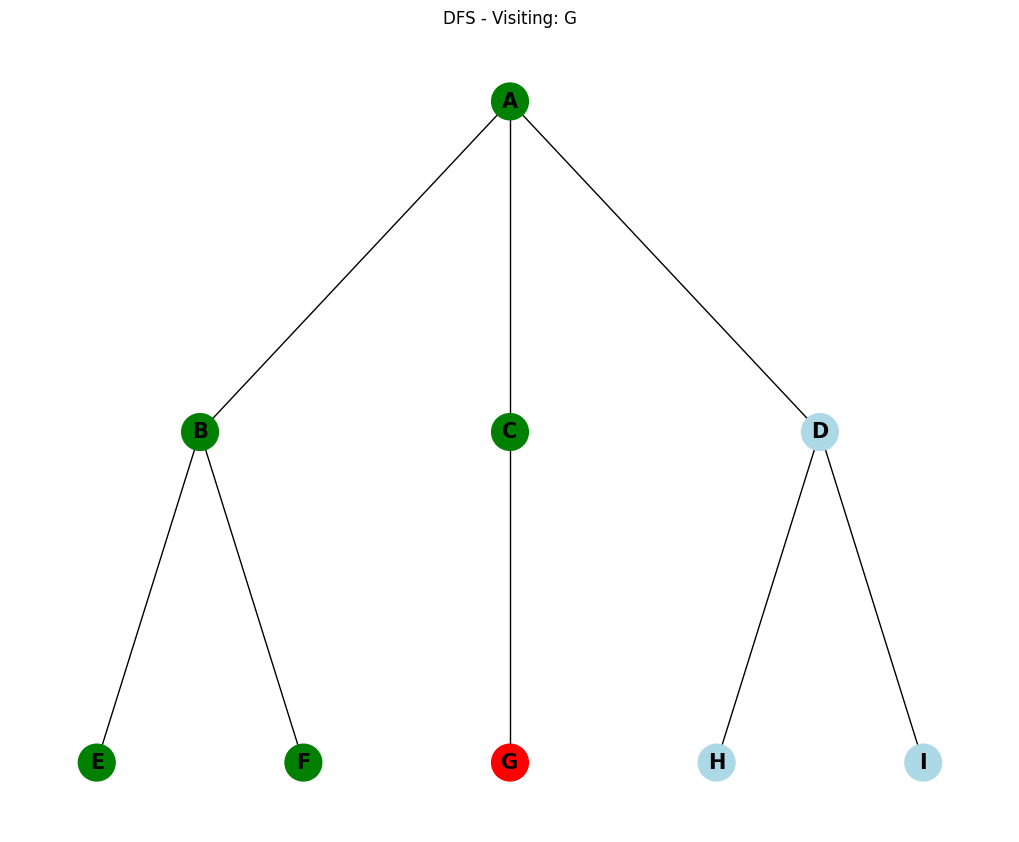

Visited: G


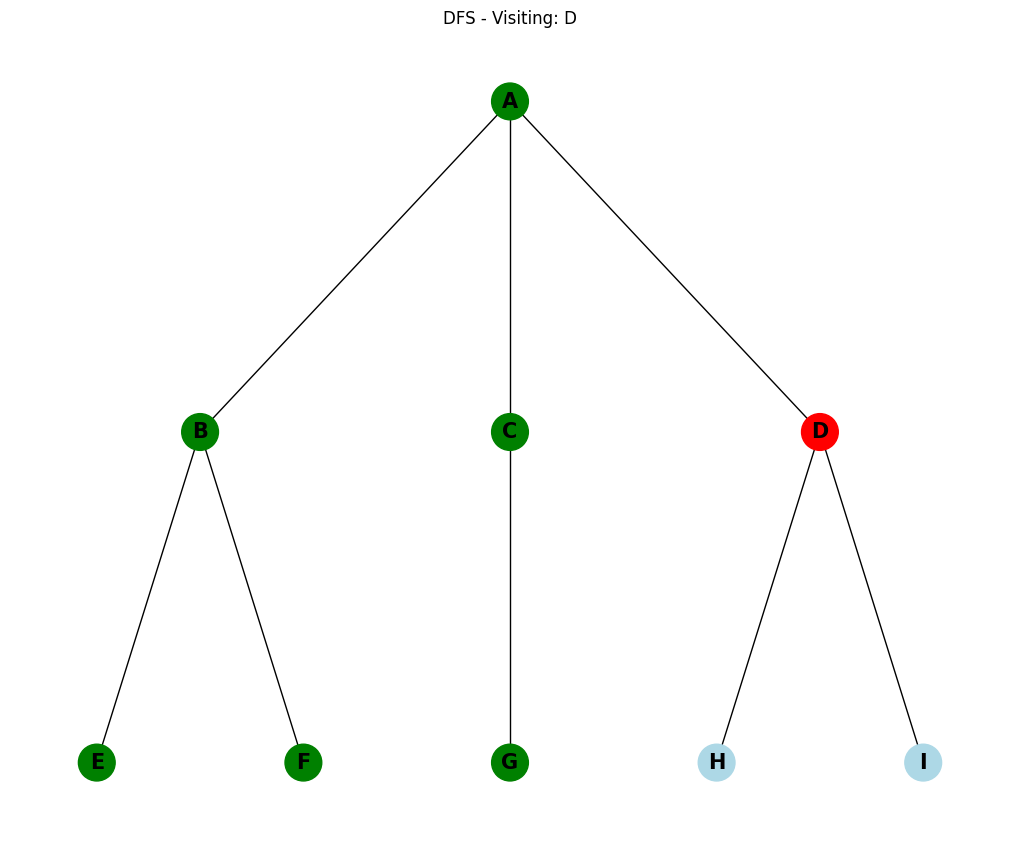

Visited: D


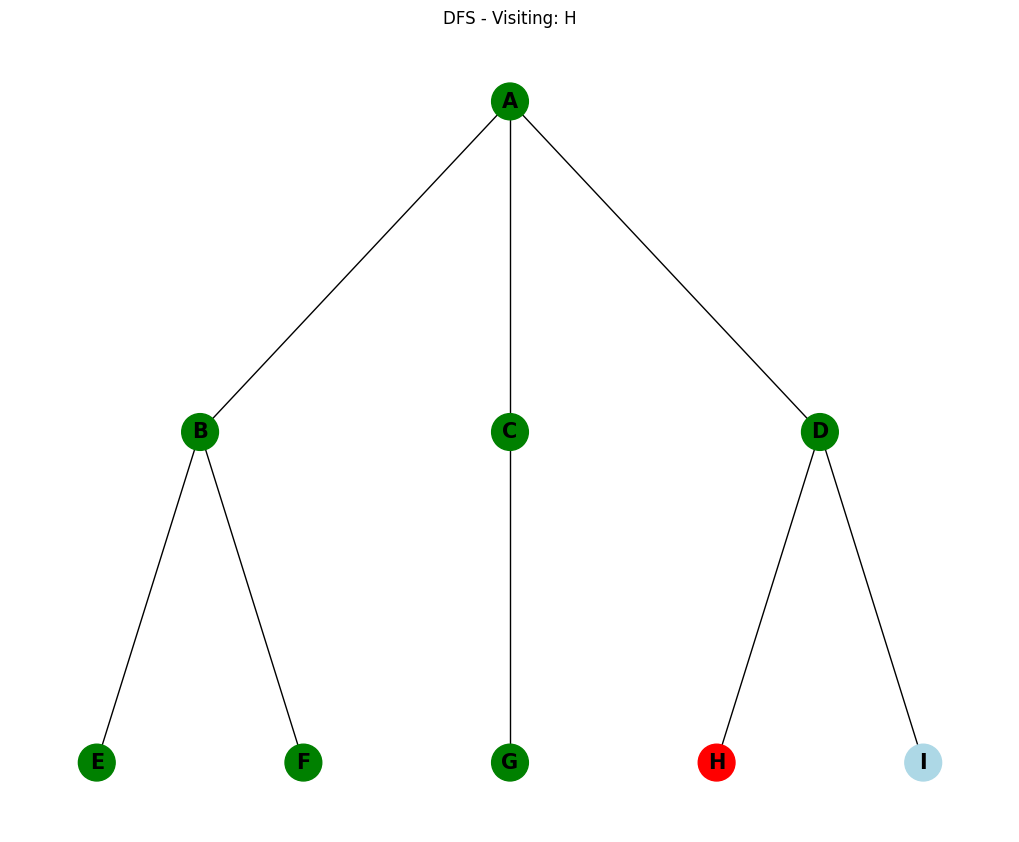

Visited: H


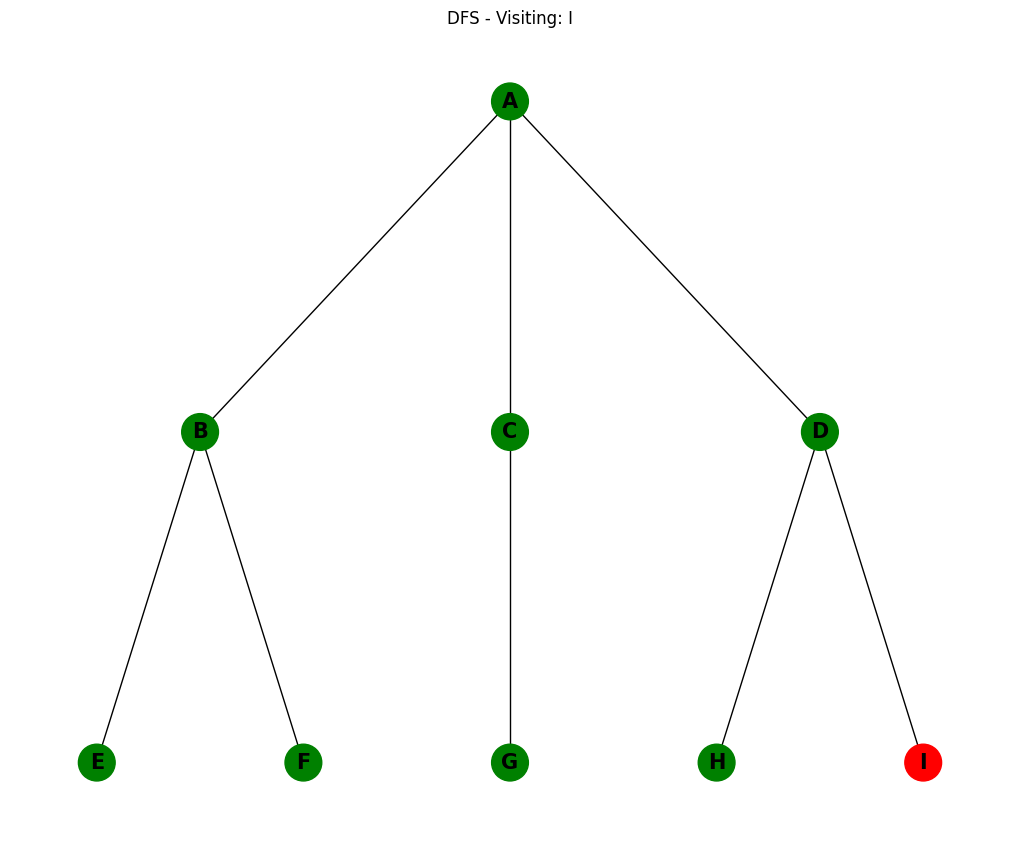

Visited: I

DFS traversal order: A -> B -> E -> F -> C -> G -> D -> H -> I


In [28]:
# Cell 7: Run DFS and show results
print("Running Depth-First Search (DFS) starting from node 'A':")
dfs_result = dfs_recursive(tree, 'A')
print(f"\nDFS traversal order: {' -> '.join(dfs_result)}")



Running Breadth-First Search (BFS) starting from node 'A':


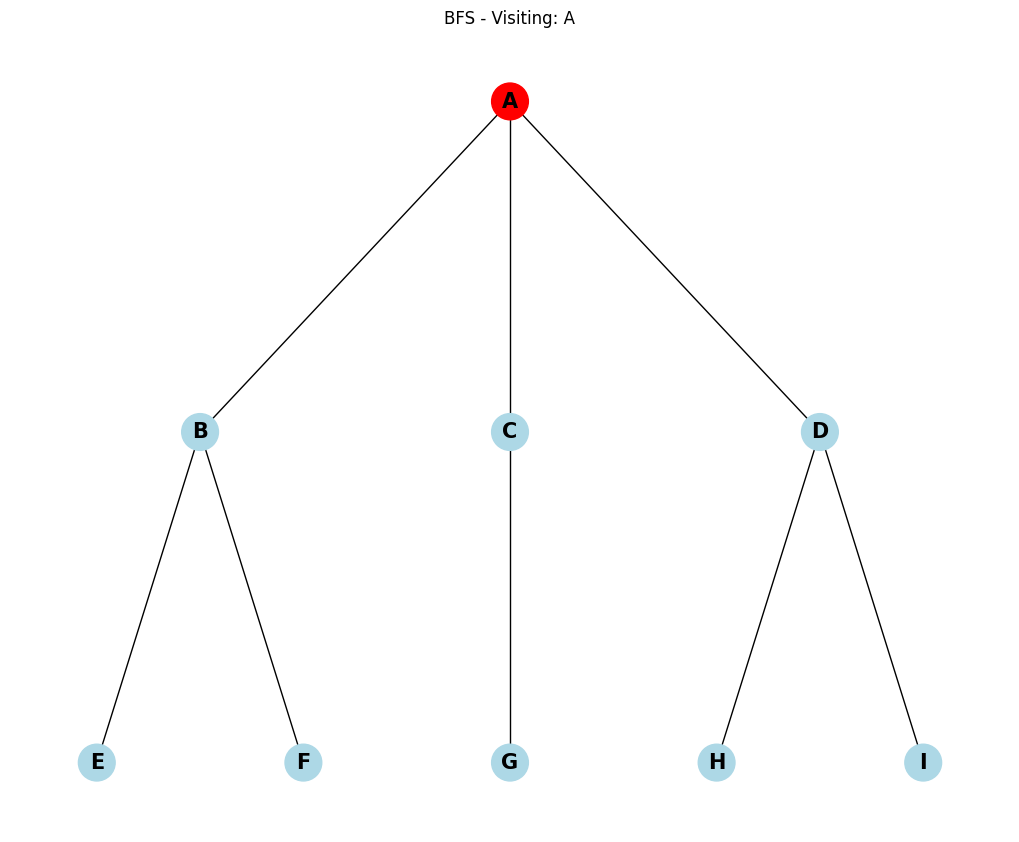

Visited: A


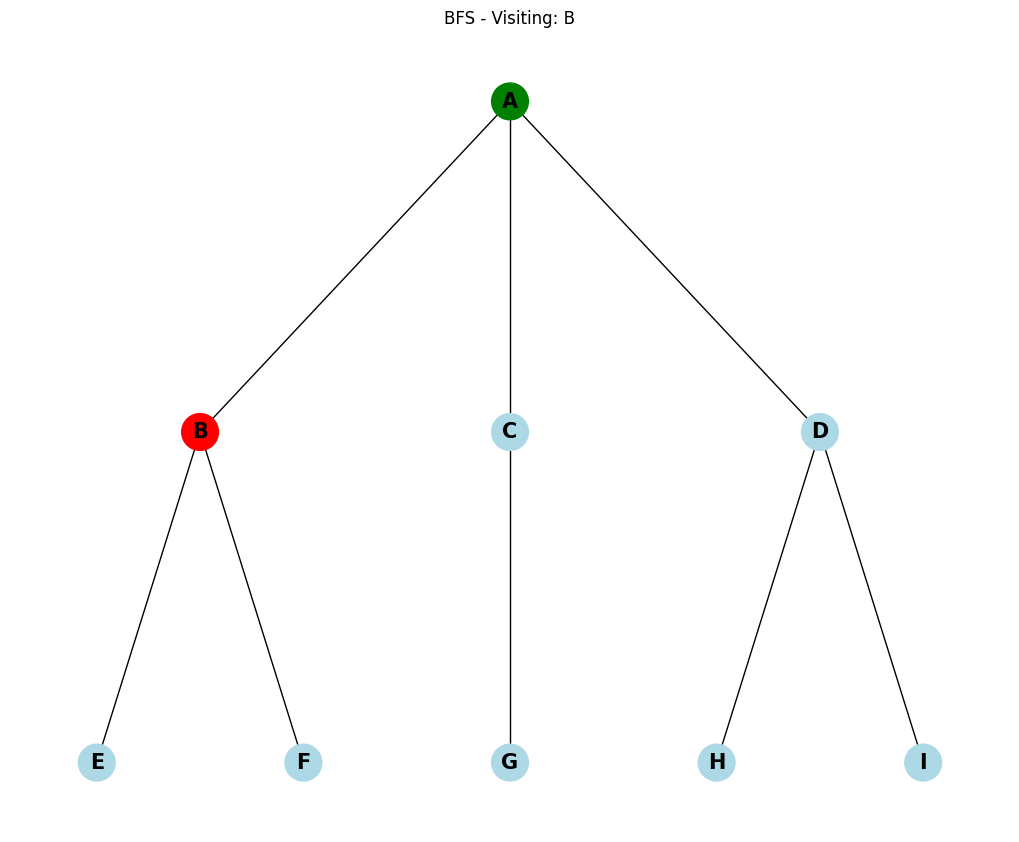

Visited: B


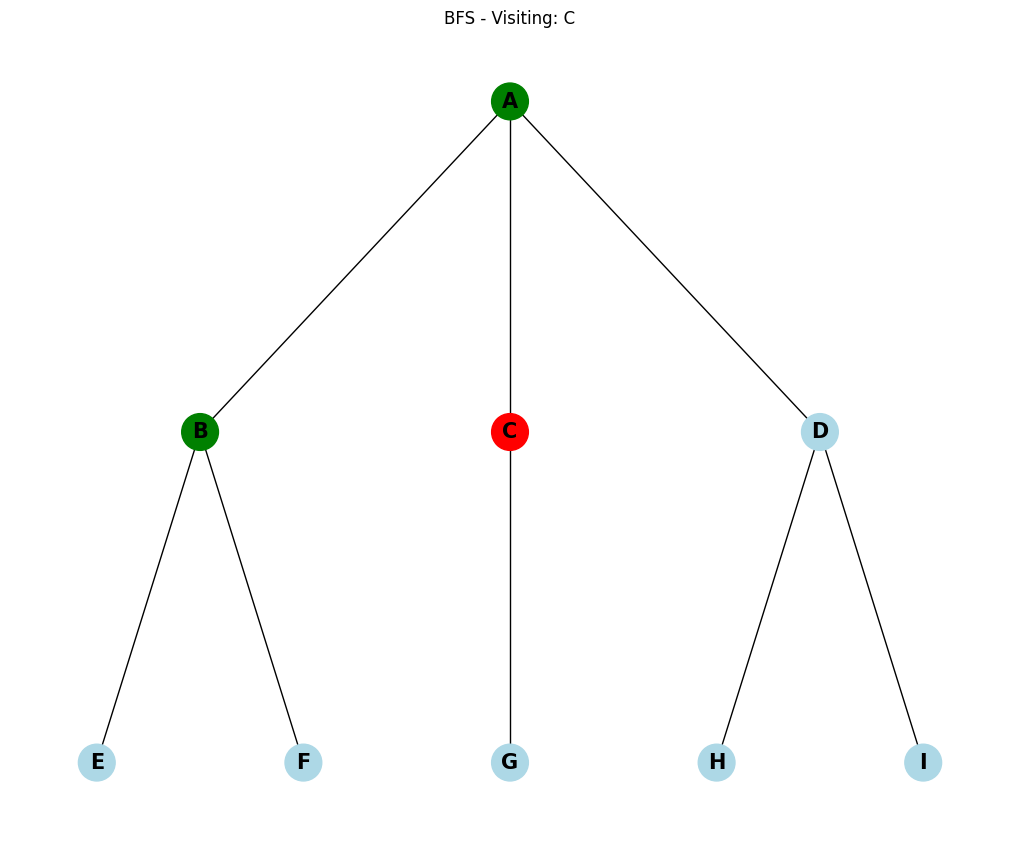

Visited: C


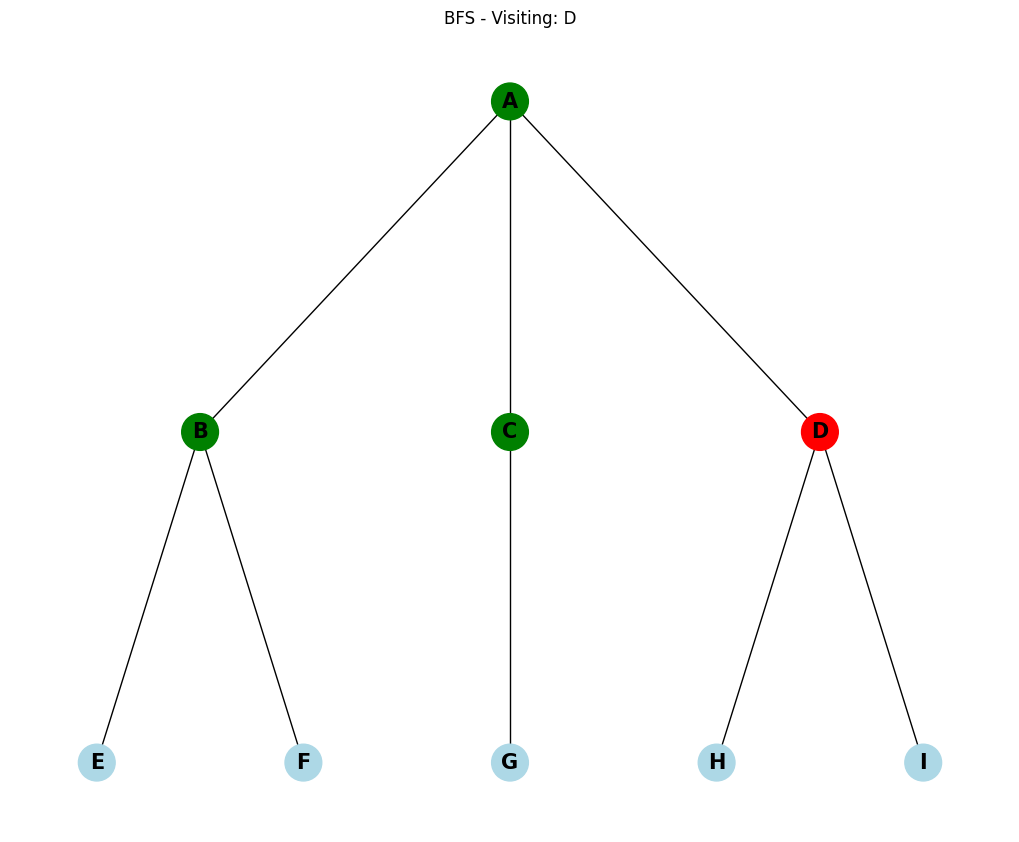

Visited: D


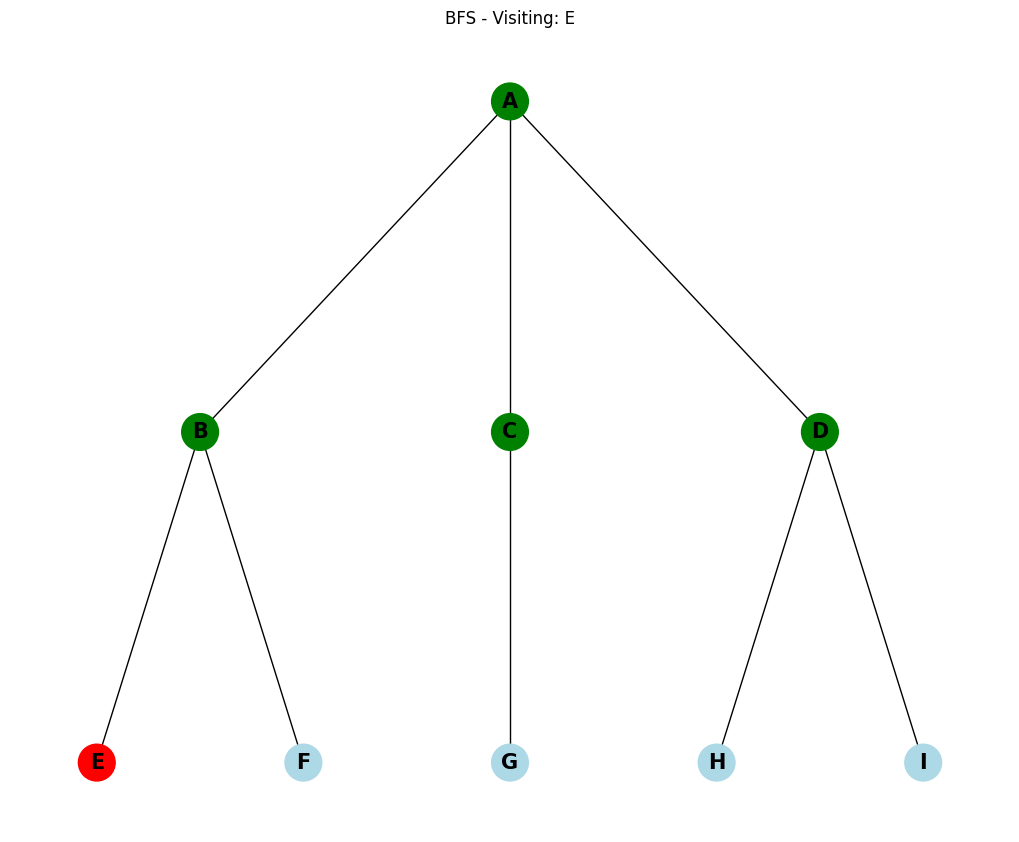

Visited: E


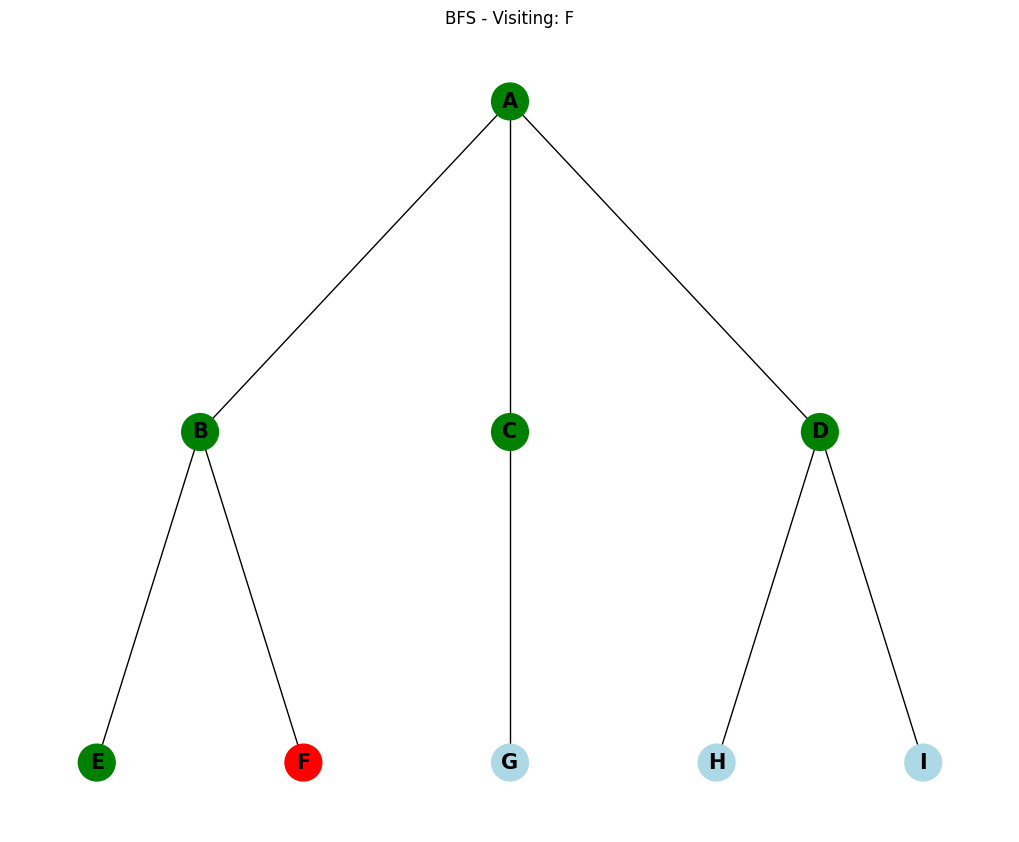

Visited: F


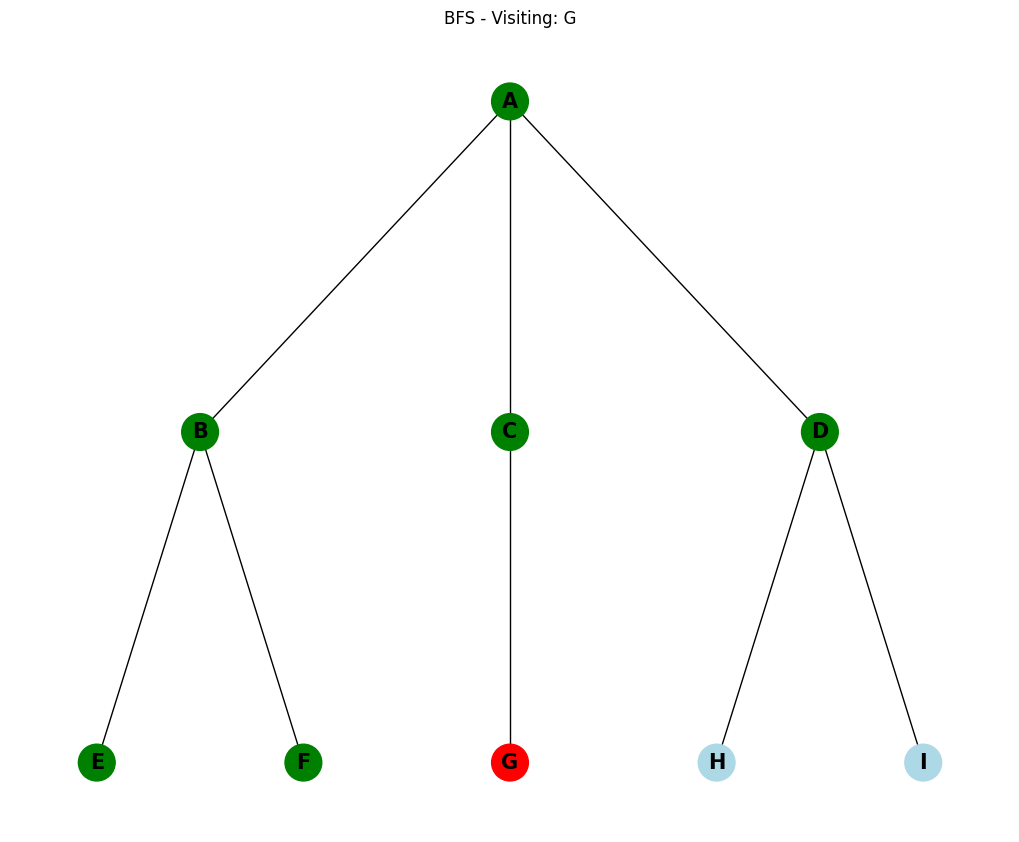

Visited: G


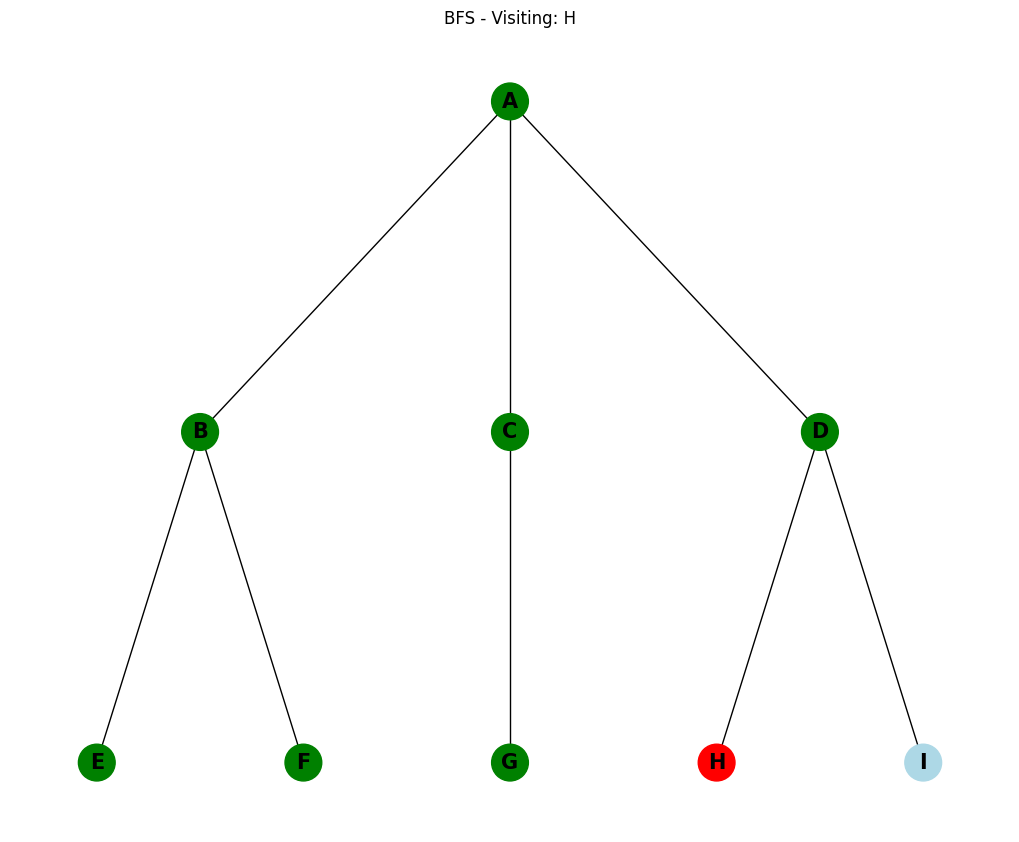

Visited: H


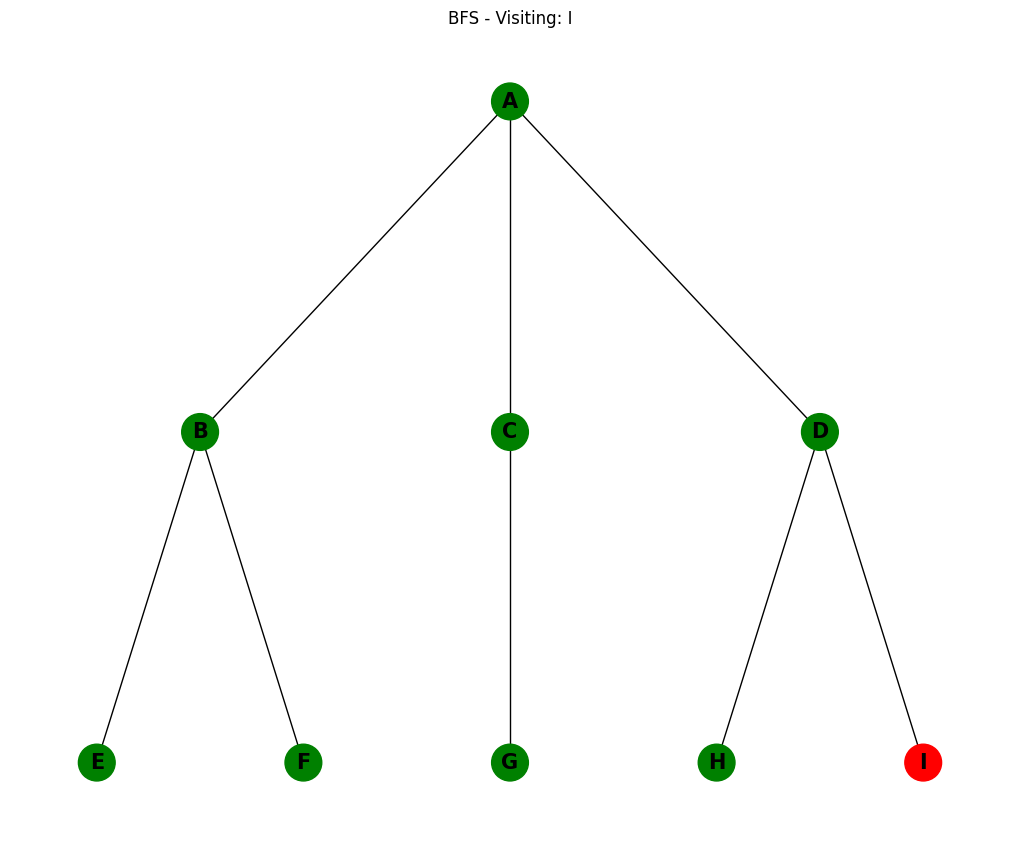

Visited: I

BFS traversal order: A -> B -> C -> D -> E -> F -> G -> H -> I


In [29]:
# Cell 8: Run BFS and show results
print("\nRunning Breadth-First Search (BFS) starting from node 'A':")
bfs_result = bfs(tree, 'A')
print(f"\nBFS traversal order: {' -> '.join(bfs_result)}")

In [30]:
# Cell 9: Compare the results
print("\nComparison of traversal orders:")
print(f"DFS: {' -> '.join(dfs_result)}")
print(f"BFS: {' -> '.join(bfs_result)}")


Comparison of traversal orders:
DFS: A -> B -> E -> F -> C -> G -> D -> H -> I
BFS: A -> B -> C -> D -> E -> F -> G -> H -> I


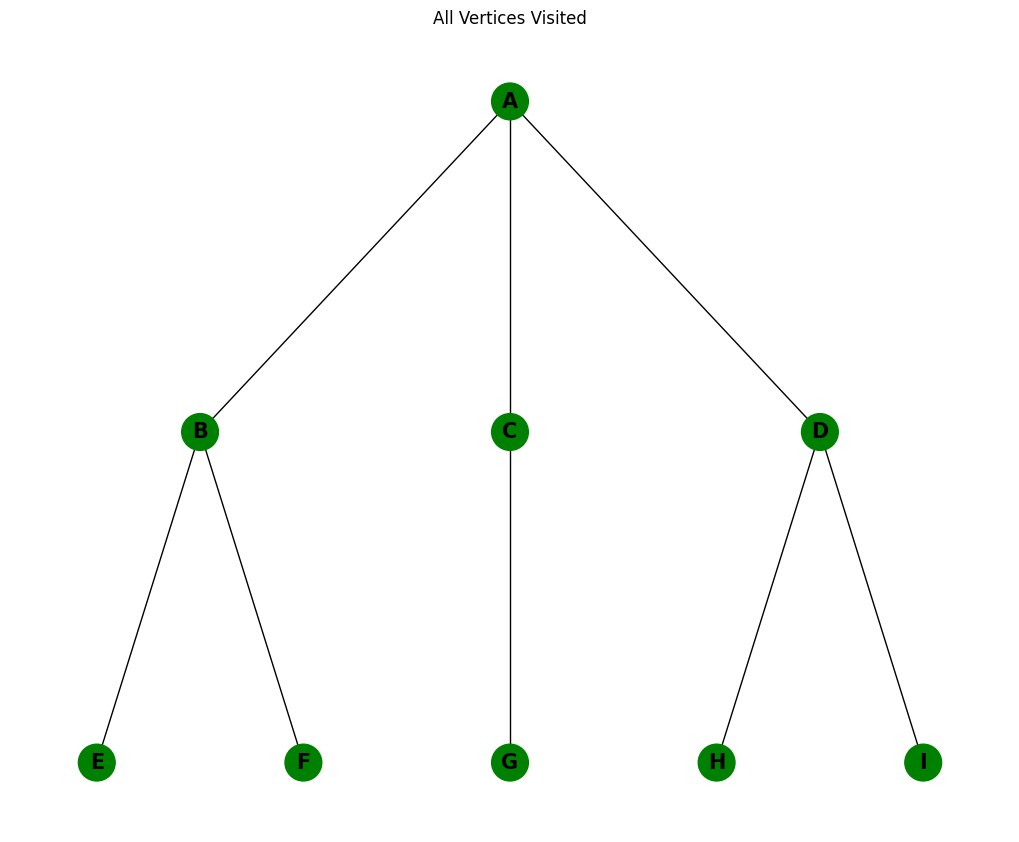

In [31]:
# Cell 10: Show final tree with all nodes visited
visualize_tree(tree, list(tree.keys()), title="All Vertices Visited")

# 1. Aim

The aim is to implement and visualize the Depth-First Search (DFS) and Breadth-First Search (BFS) algorithms for traversing an undirected graph/tree data structure, and to demonstrate the differences between these two fundamental graph traversal techniques.

# 2. Objectives

- Implement a recursive Depth-First Search (DFS) algorithm for undirected graphs
- Implement a Breadth-First Search (BFS) algorithm for undirected graphs
- Create a visual representation of an undirected tree-like graph
- Visualize the step-by-step traversal process of both algorithms
- Compare the traversal paths produced by DFS and BFS
- Understand the practical applications of these search algorithms

# 3. Expected Output

The program will produce:
- A visualization of the initial tree structure
- Step-by-step visualizations showing the traversal path for DFS, highlighting:
  - Current node being visited (red)
  - Previously visited nodes (green)
  - Unvisited nodes (light blue)
- Step-by-step visualizations showing the traversal path for BFS with the same color scheme
- Console output showing the order of nodes visited during each traversal
- A final comparison of the complete traversal paths for both algorithms

For DFS, the expected traversal path will likely be: A → B → E → F → C → G → D → H → I
For BFS, the expected traversal path will likely be: A → B → C → D → E → F → G → H → I

# 4. Software and Hardware Requirements

**Software Requirements:**
- Python 3.6 or higher
- Python libraries:
  - NetworkX (for graph creation and manipulation)
  - Matplotlib (for visualization)
  - Collections module (for deque implementation in BFS)
- Code editor or IDE (e.g., VSCode, PyCharm, Jupyter Notebook)

**Hardware Requirements:**
- Any computer capable of running Python
- Minimum 4GB RAM (recommended)
- Display with resolution of at least 1280x720 for proper visualization
- Sufficient disk space for Python and required libraries

# 5. Prerequisites

**Knowledge Prerequisites:**
- Basic understanding of Python programming
- Familiarity with:
  - Data structures (particularly graphs and trees)
  - Recursion
  - Queue data structure
  - Basic algorithmic concepts

**Technical Prerequisites:**
- Python environment set up with required libraries installed:
  ```bash
  pip install networkx matplotlib
  ```

# 6. Theory

## a. Necessary Definitions and Explanations

### Graph
A graph is a mathematical structure used to model pairwise relationships between objects. It consists of:
- **Vertices** (or nodes): Points or objects in the graph
- **Edges**: Connections between pairs of vertices

### Types of Graphs
- **Undirected Graph**: Edges have no orientation (the connection between two vertices goes both ways)
- **Directed Graph**: Edges have orientation (connections between vertices have direction)
- **Tree**: A connected acyclic graph where any two vertices are connected by exactly one path

### Graph Traversal
Graph traversal is the process of visiting each vertex in a graph exactly once. The two primary methods are:

### Depth-First Search (DFS)
DFS is an algorithm that starts at a root node and explores as far as possible along each branch before backtracking. It uses a stack data structure (implicit through recursion or explicit) to keep track of vertices.

**Key Characteristics:**
- Goes deep into a path before exploring alternatives
- Memory efficient when path is deep
- Naturally implemented using recursion
- Uses a stack (LIFO - Last In, First Out)

### Breadth-First Search (BFS)
BFS is an algorithm that starts at a root node and explores all neighbors at the present depth before moving to nodes at the next depth level. It uses a queue data structure to keep track of vertices.

**Key Characteristics:**
- Explores all neighbors before moving to the next level
- Finds the shortest path in unweighted graphs
- Implemented using a queue
- Uses a queue (FIFO - First In, First Out)

### Adjacency List
An adjacency list is a collection of unordered lists, one for each vertex in the graph. Each list describes the set of neighbors of its vertex. In the provided code, the adjacency list is implemented as a Python dictionary.

## b. Computation

### DFS Computation Process
1. Start at a designated node (root)
2. Mark the current node as visited
3. Recursively visit all unvisited adjacent nodes
4. Backtrack when no unvisited adjacent nodes remain

**Time Complexity**: O(V + E) where V is the number of vertices and E is the number of edges
**Space Complexity**: O(V) for the visited array and recursion stack

### BFS Computation Process
1. Start at a designated node (root)
2. Mark it as visited and enqueue it
3. While the queue is not empty:
   a. Dequeue a vertex
   b. Visit all unvisited adjacent nodes
   c. Mark them as visited and enqueue them

**Time Complexity**: O(V + E) where V is the number of vertices and E is the number of edges
**Space Complexity**: O(V) for the visited array and queue

## c. Algorithms

### DFS Algorithm (Recursive)
```python
def dfs_recursive(graph, node, visited=None):
    # Initialize visited set if not provided
    if visited is None:
        visited = set()
    
    # Mark current node as visited
    visited.add(node)
    
    # Recursively visit all unvisited neighbors
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs_recursive(graph, neighbor, visited)
    
    return visited
```

### BFS Algorithm
```python
def bfs(graph, start):
    visited = set()
    queue = deque([start])
    
    while queue:
        node = queue.popleft()
        
        if node not in visited:
            visited.add(node)
            
            # Add all unvisited neighbors to queue
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append(neighbor)
    
    return visited
```

## d. Example

Consider the tree structure from the code:
```
    A
   /|\
  B C D
 /|  /|
E F G H I
```

### DFS Traversal:
1. Start at A (root)
2. Visit first neighbor of A: B
3. Visit first neighbor of B: A (already visited, skip)
4. Visit next neighbor of B: E
5. E has no unvisited neighbors, backtrack to B
6. Visit next neighbor of B: F
7. F has no unvisited neighbors, backtrack to B
8. B has no more unvisited neighbors, backtrack to A
9. Visit next neighbor of A: C
10. Continue this pattern...

Final DFS path: A → B → E → F → C → G → D → H → I

### BFS Traversal:
1. Start at A (root)
2. Visit all neighbors of A: B, C, D
3. Visit all neighbors of B (except A which is already visited): E, F
4. Visit all neighbors of C (except A which is already visited): G
5. Visit all neighbors of D (except A which is already visited): H, I

Final BFS path: A → B → C → D → E → F → G → H → I

## e. Applications

### Applications of DFS:
1. **Finding connected components** in a graph
2. **Detecting cycles** in a graph
3. **Topological sorting** for scheduling tasks with dependencies
4. **Solving mazes** and puzzles
5. **Finding paths** between two vertices
6. **Web crawling** - following links from one page to another
7. **Generating game trees** for AI in games like chess
8. **Strongly connected components** identification

### Applications of BFS:
1. **Shortest path finding** in unweighted graphs
2. **Network broadcasting** - sending a message to all nodes
3. **Garbage collection** in programming languages
4. **Finding all nodes within a connected component**
5. **Testing bipartiteness** of a graph
6. **Finding the level structure** of a graph
7. **GPS navigation systems** to find nearby locations
8. **Social networking** - finding people within a certain degree of connection

### Real-world Applications:
1. **Navigation Systems**: Finding routes between locations
2. **Social Networks**: Friend recommendations, connection paths
3. **Web Indexing**: Search engine crawlers use both DFS and BFS
4. **Network Broadcasting**: Efficient distribution of information
5. **Circuit Design**: Analyzing connectivity and signal paths
6. **Artificial Intelligence**: Game playing algorithms
7. **Operating Systems**: Process scheduling and memory management
8. **Computer Networks**: Routing algorithms
9. **Robotics**: Path planning and obstacle avoidance

      
# 7. Conclusion

The implementation and visualization of Depth-First Search (DFS) and Breadth-First Search (BFS) algorithms demonstrate their distinct traversal patterns in graph structures. Both algorithms are efficient with a time complexity of O(V + E), where V is the number of vertices and E is the number of edges.

Key findings from this implementation:

1. **DFS** explores as deeply as possible along each branch before backtracking, making it particularly useful for problems requiring complete path exploration, cycle detection, and topological sorting. The recursive implementation showcases how the call stack naturally facilitates the depth-first approach.

2. **BFS** explores all neighbors at the current depth before moving to nodes at the next level, making it ideal for finding shortest paths in unweighted graphs and for situations where a breadth-wise exploration is preferred.

3. The visualization component effectively illustrates how each algorithm traverses the graph differently, providing an intuitive understanding of their behaviors. This visual representation is particularly valuable for educational purposes.

4. The implementation demonstrates that both algorithms guarantee complete traversal of a connected graph, visiting each node exactly once, though in different orders.

5. While this implementation used a tree-like structure, both algorithms can be applied to any general graph, with additional mechanisms needed to handle cycles.

These graph traversal algorithms serve as fundamental building blocks for solving more complex problems in computer science and have extensive applications in real-world scenarios, from social network analysis to routing in computer networks and navigation systems.